C:\Users\hskma\AppData\Local\Temp\ipykernel_17512\2486742704.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, pd.DataFrame([row])], ignore_index=True)


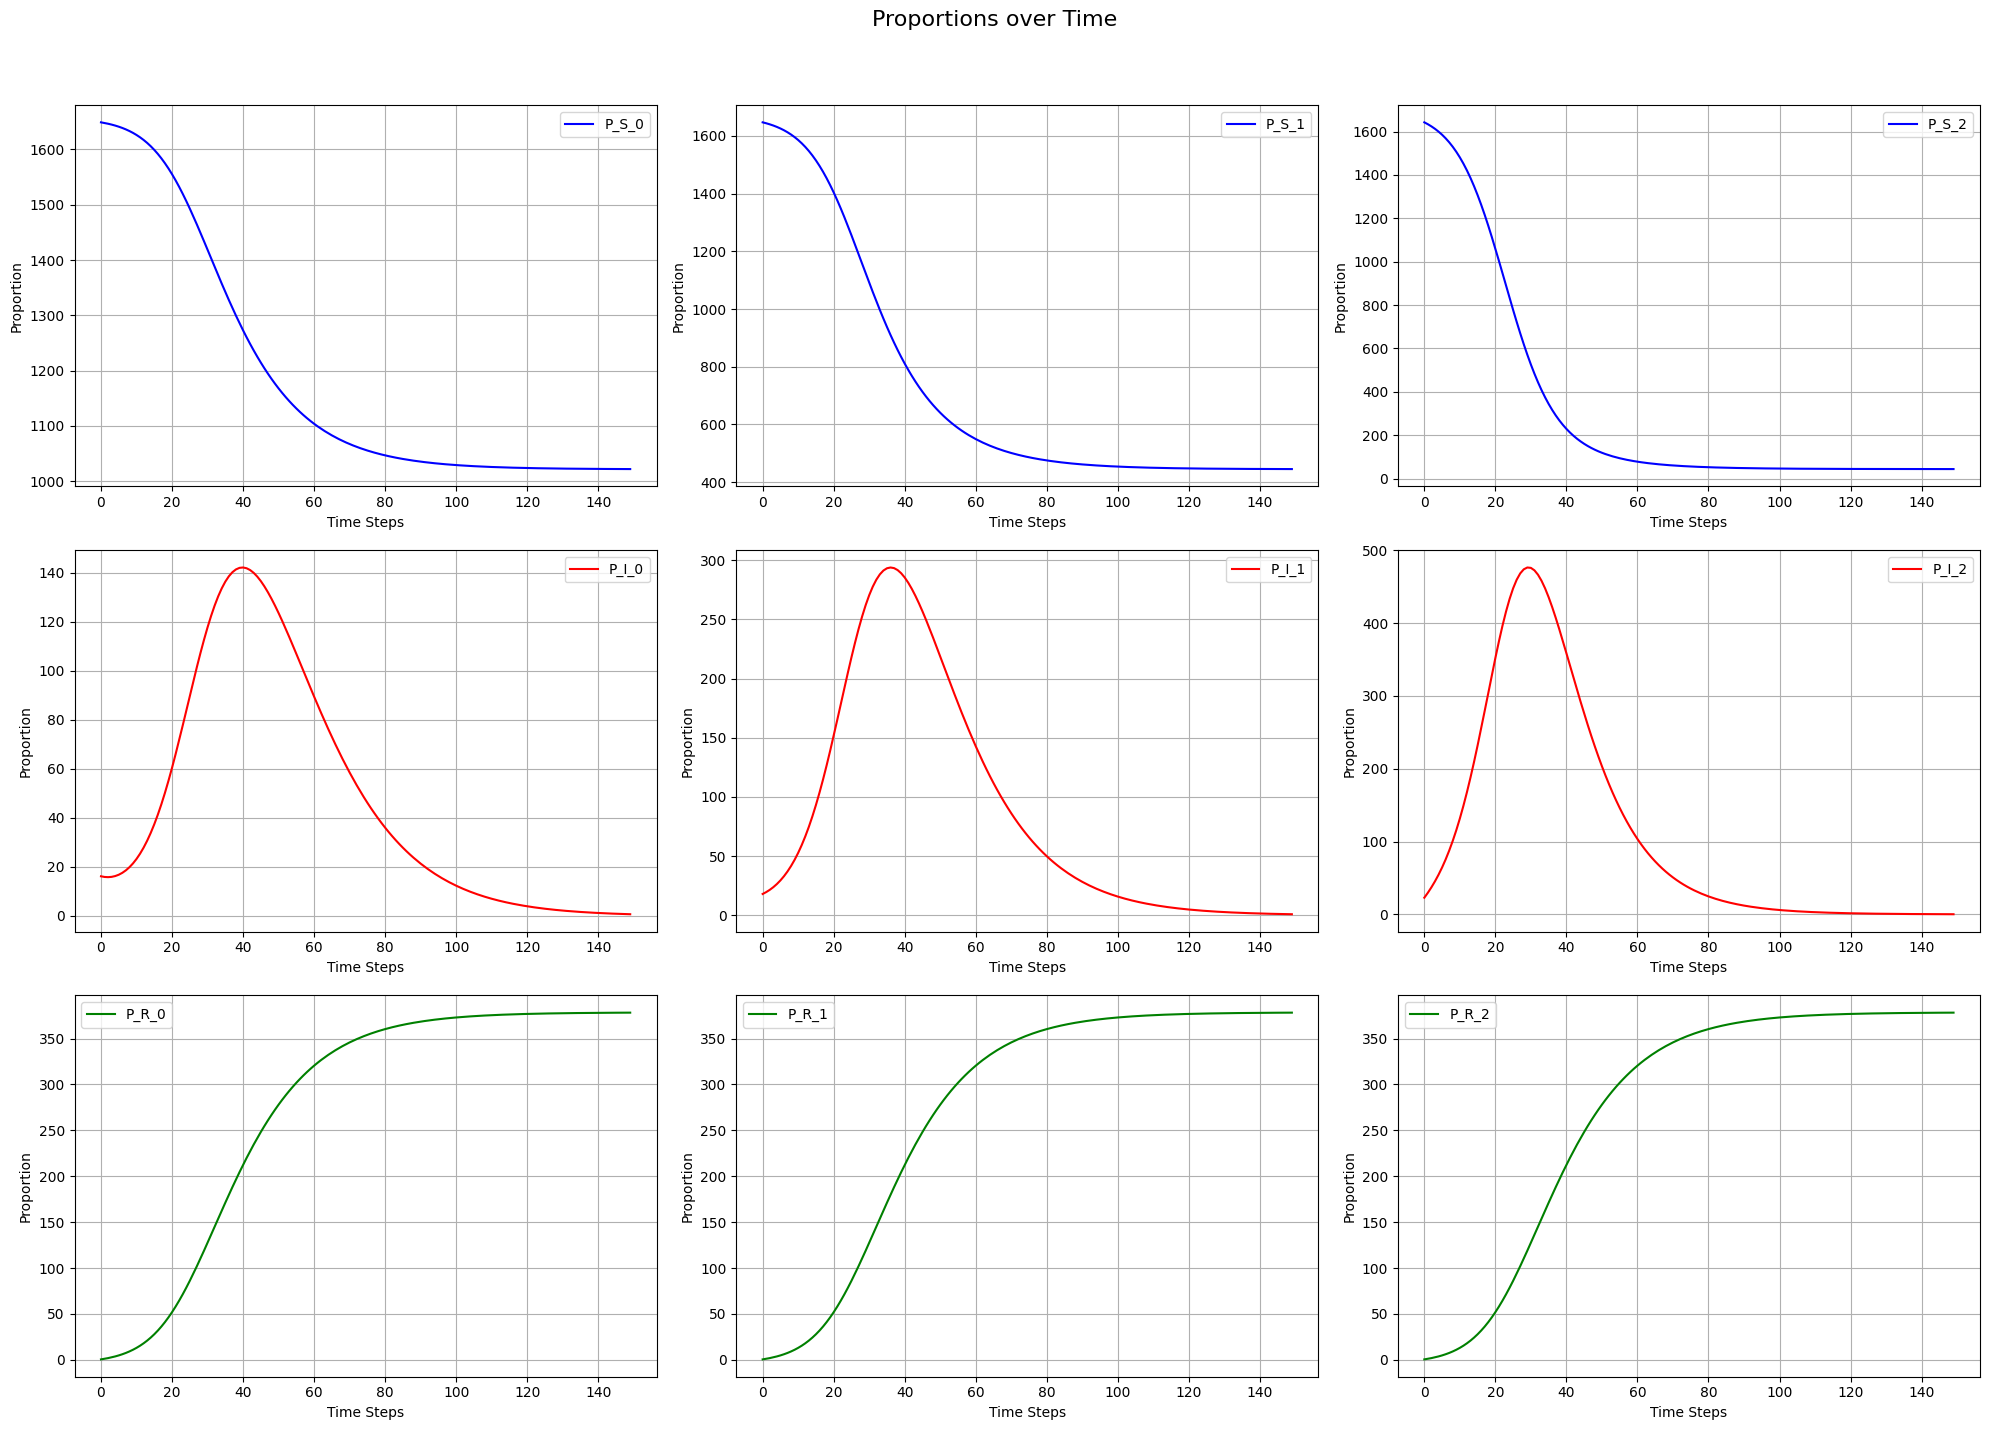

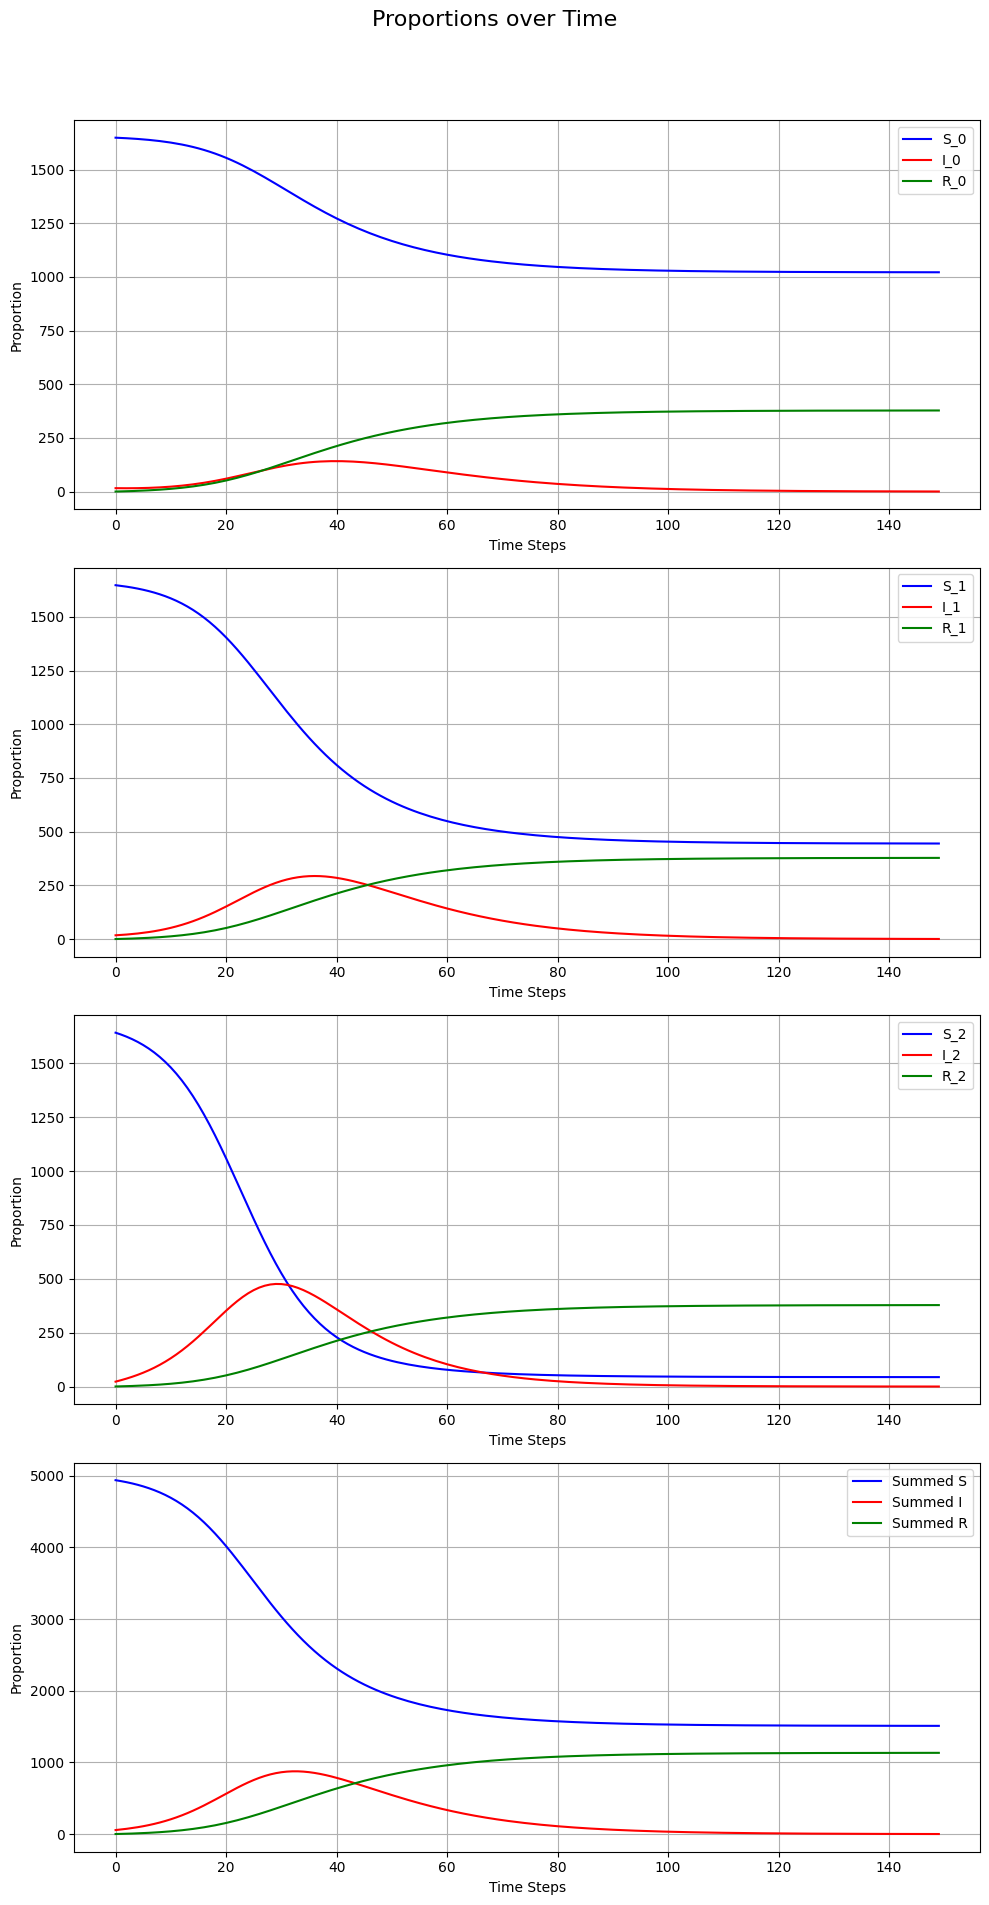

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

N = 5000
int_I = 0.01 * N
int_R = 0
int_S = N - int_I - int_R  # S_0 is starting susceptible
beta = 0.7
gamma = 0.01
MaxTime = 150
RunTime = np.linspace(0, MaxTime, MaxTime)
n = 2  # Final value of q1, q2

def pi(q, n):
    return np.exp(q) / np.sum(np.exp(np.arange(n + 1)))

# Initialize initial values
initial_values = {f'P_S_{i}': int_S / (n + 1) for i in range(n + 1)}
initial_values.update({f'P_I_{i}': int_I / (n + 1) for i in range(n + 1)})
initial_values.update({f'P_R_{i}': int_R / (n + 1) for i in range(n + 1)})

# Equations for updating proportions
def update_proportions_S(row, beta, N, n):
    for i in range(n + 1):
        row[f'P_S_{i}'] -= pi(i, n) * beta * row[f'P_S_{i}'] * sum(row[f'P_I_{j}'] for j in range(n + 1)) / N
    return row

def update_proportions_I(row, beta, gamma, N, n):
    for i in range(n + 1):
        row[f'P_I_{i}'] += pi(i, n) * beta * row[f'P_S_{i}'] * sum(row[f'P_I_{j}'] for j in range(n + 1)) / N - (3 ** n) * gamma * row[f'P_I_{i}']
    return row

def update_proportions_R(row, gamma, n):
    for i in range(n + 1):
        row[f'P_R_{i}'] += gamma * sum(row[f'P_I_{j}'] for j in range(n + 1))
    return row

def run_simulation(initial_values, beta, gamma, steps, N, n):
    data = pd.DataFrame(columns=[f'P_S_{i}' for i in range(n + 1)] + [f'P_I_{i}' for i in range(n + 1)] + [f'P_R_{i}' for i in range(n + 1)])
    row = initial_values.copy()

    for _ in range(steps):
        row = update_proportions_S(row, beta, N, n)
        row = update_proportions_I(row, beta, gamma, N, n)
        row = update_proportions_R(row, gamma, n)
        data = pd.concat([data, pd.DataFrame([row])], ignore_index=True)

    return data

def plot_simulation(data, n):
    num_plots = n + 1
    fig, axes = plt.subplots(3, num_plots, figsize=(20, 15))
    fig.suptitle('Proportions over Time', fontsize=16)

    for i in range(n + 1):
        axes[0, i].plot(data[f'P_S_{i}'], label=f'P_S_{i}', color='blue')
        axes[0, i].set_xlabel('Time Steps')
        axes[0, i].set_ylabel('Proportion')
        axes[0, i].legend()
        axes[0, i].grid(True)

        axes[1, i].plot(data[f'P_I_{i}'], label=f'P_I_{i}', color='red')
        axes[1, i].set_xlabel('Time Steps')
        axes[1, i].set_ylabel('Proportion')
        axes[1, i].legend()
        axes[1, i].grid(True)

        axes[2, i].plot(data[f'P_R_{i}'], label=f'P_R_{i}', color='green')
        axes[2, i].set_xlabel('Time Steps')
        axes[2, i].set_ylabel('Proportion')
        axes[2, i].legend()
        axes[2, i].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    fig, axes = plt.subplots(num_plots + 1, 1, figsize=(10, 20))  # +1 for the summed plots
    fig.suptitle('Proportions over Time', fontsize=16)

   
    for i in range(num_plots):
        axes[i].plot(data[f'P_S_{i}'], label=f'S_{i}', color='blue')
        axes[i].plot(data[f'P_I_{i}'], label=f'I_{i}', color='red')
        axes[i].plot(data[f'P_R_{i}'], label=f'R_{i}', color='green')
        axes[i].set_xlabel('Time Steps')
        axes[i].set_ylabel('Proportion')
        axes[i].legend()
        axes[i].grid(True)
    

    # Summed compartments plot
    summed_S = data[[f'P_S_{i}' for i in range(num_plots)]].sum(axis=1)
    summed_I = data[[f'P_I_{i}' for i in range(num_plots)]].sum(axis=1)
    summed_R = data[[f'P_R_{i}' for i in range(num_plots)]].sum(axis=1)
    
    axes[num_plots].plot(summed_S, label='Summed S', color='blue')
    axes[num_plots].plot(summed_I, label='Summed I', color='red')
    axes[num_plots].plot(summed_R, label='Summed R', color='green')
    axes[num_plots].set_xlabel('Time Steps')
    axes[num_plots].set_ylabel('Proportion')
    axes[num_plots].legend()
    axes[num_plots].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


# Run simulation
data = run_simulation(initial_values, beta, gamma, MaxTime, N, n)


# Plot the results
plot_simulation(data, n)
